# Numpy

NumPy (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. In some ways, NumPy arrays are like Python’s built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size. NumPy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use NumPy effectively will be valuable no matter what aspect of data science interests you.

In [1]:
import numpy
numpy.__version__

'1.18.3'

In [7]:
# We can create alias, so that don't need to write whole name again and again

import numpy as np
np.__version__

'1.18.3'

## Understanding Data Types in Python

 * Python decide the data type dynamically. We can store any type of data any variable

In [8]:
result = 0
result = 'Success'

## A Python Integer Is More Than Just an Integer

The standard Python implementation is written in C. This means that every Python object is simply a cleverly disguised C structure, which contains not only its value, but other information as well. For example, when we define an integer in Python, such as x = 10000, x is not just a “raw” integer. It’s actually a pointer to a compound C structure, which contains several values. Looking through the Python 3.4 source code, we find that the integer (long) type definition effectively looks like this (once the C macros are expanded):

struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};

A single integer in Python 3.4 actually contains four pieces:

* ob_refcnt, a reference count that helps Python silently handle memory allocation and deallocation

* ob_type, which encodes the type of the variable

* ob_size, which specifies the size of the following data members

* ob_digit, which contains the actual integer value that we expect the Python variable to represent

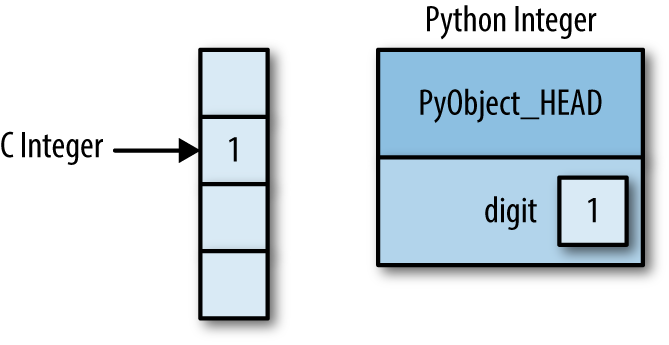


## A Python List Is More Than Just a List

> Let’s consider now what happens when we use a Python data structure that holds many Python objects. The standard mutable multielement container in Python is the list.

In [13]:
# We can create a list of integers as follows:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
type(L[0])

int

In [12]:
type(L)

list

In [14]:
# Or, similarly, a list of strings:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [15]:
type(L2[0])

str

In [17]:
# Because of Python’s dynamic typing, we can even create heterogeneous lists:

L3 = [True, 2, 4.0, "Hello"]
L3

[True, 2, 4.0, 'Hello']

In [21]:
type(L3[0])

bool

In [24]:
 [type(item) for item in L3]

[bool, int, float, str]

At the implementation level, the array essentially contains a single pointer to one contiguous block of data. The Python list, on the other hand, contains a pointer to a block of pointers, each of which in turn points to a full Python object like the Python integer we saw earlier. Again, the advantage of the list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled with data of any desired type. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for storing and manipulating data.

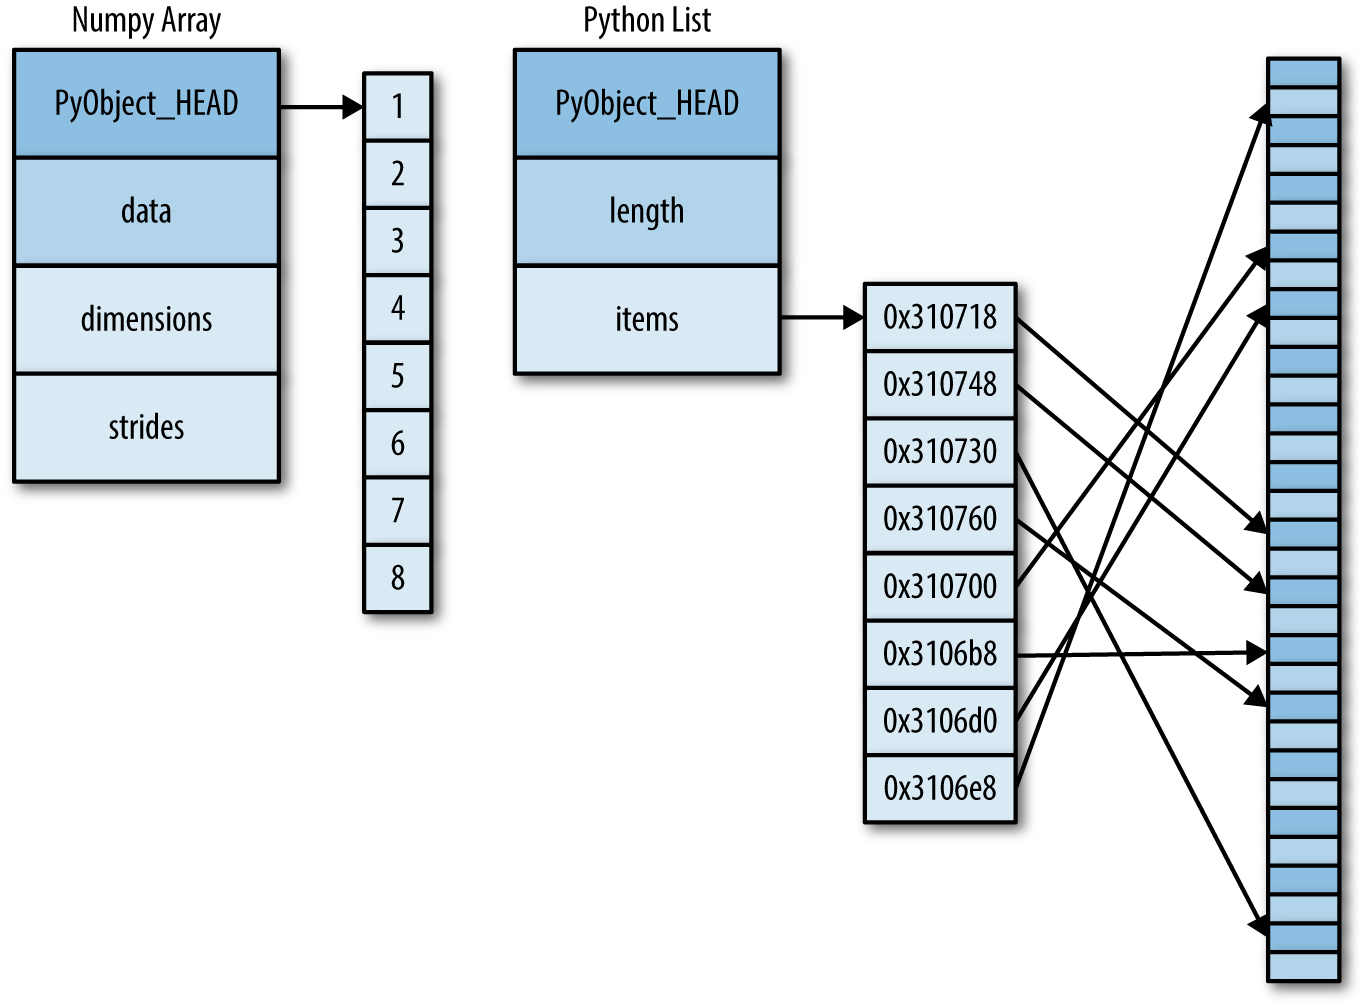

## Fixed-Type Arrays in Python

> Python offers several different options for storing data in efficient, fixed-type data buffers.



In [26]:
import array
L = list(range(10))
A = array.array('i', L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Creating Arrays from Python Lists

In [27]:
import numpy as np

# First, we can use np.array to create arrays from Python lists:
# Integer Array

np.array([1,2,4,6,8])

array([1, 2, 4, 6, 8])

In [28]:
# Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type. 
# If types do not match, NumPy will upcast if possible (here, integers are upcast to floating point):

np.array([3.14, 4, 2, 3])

array([3.14, 4.  , 2.  , 3.  ])

If we want to explicitly set the data type of the resulting array, we can use the dtype keyword:

In [29]:
np.array([1, 2, 3, 4], dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

Finally, unlike Python lists, NumPy arrays can explicitly be multidimensional; here’s one way of initializing a multidimensional array using a list of lists:

In [30]:
# nested lists result in multidimensional arrays
np.array([range(i, i + 3) for i in [2, 4, 6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

# The Basics of NumPy Arrays

> Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas are built around the NumPy array.

## We’ll cover a few categories of basic array manipulations here:

### Attributes of arrays
Determining the size, shape, memoryconsumption, and data types of arrays

### Indexing of arrays
Getting and setting the value of individualarray elements

### Slicing of arrays
Getting and setting smaller subarrays within alarger array

### Reshaping of arrays
Changing the shape of a given array

### Joining and splitting of arrays
Combining multiple arrays into one,and splitting one array into many



## NumPy Array Attributes
First let’s discuss some useful array attributes. We’ll start by defining three random arrays: a one-dimensional, two-dimensional, and three-dimensional array. We’ll use NumPy’s random number generator, which we will seed with a set value in order to ensure that the same random arrays are generated each time this code is run:

In [31]:
import numpy as np

# seed for reproducibility
np.random.seed(0)

# One-dimentional array
x1  = np.random.randint(10, size = 6)

# Two dimentional array
x2 = np.random.randint(10, size = (3, 4))

# Three dimentional aaray
x3 = np.random.randint(10, size = (3,4,5))

Each array has attributes ndim (the number of dimensions), shape (the size of each dimension), and size (the total size of the array):

In [32]:
print("x3 ndim: ", x3.ndim)
print("x3 shape: ", x3.shape)
print("x3 size: ", x3.size)

x3 ndim:  3
x3 shape:  (3, 4, 5)
x3 size:  60


Another useful attribute is the dtype, the data type of the array

In [34]:
print("dtype:", x3.dtype)

dtype: int32


Other attributes include itemsize, which lists the size (in bytes) of each array element, and nbytes, which lists the total size (in bytes) of the array:

In [35]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 4 bytes
nbytes: 240 bytes


## Array Slicing: Accessing Subarrays

Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon (:) character. The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array x, use this:

### x[start:stop:step]

If any of these are unspecified, they default to the values start=0, stop=size of dimension, step=1. We’ll take a look at accessing subarrays in one dimension and in multiple dimensions.

In [36]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
x[:5]  # first five elements

array([0, 1, 2, 3, 4])

In [38]:
x[5:]  # elements after index 5

array([5, 6, 7, 8, 9])

In [39]:
x[1::2]  # every other element, starting at index 1

array([1, 3, 5, 7, 9])

A potentially confusing case is when the step value is negative. In this case, the defaults for start and stop are swapped. This becomes a convenient way to reverse an array:

In [40]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [41]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

### MULTIDIMENSIONAL SUBARRAYS
Multidimensional slices work in the same way, with multiple slices separated by commas. For example:

In [45]:
x2
x2.shape

(3, 4)

In [42]:
x2[:2, :3]  # two rows, three columns

array([[3, 5, 2],
       [7, 6, 8]])

In [43]:
x2[::-1, ::-1]

array([[7, 7, 6, 1],
       [8, 8, 6, 7],
       [4, 2, 5, 3]])

### SUBARRAYS AS NO-COPY VIEWS
One important—and extremely useful—thing to know about array slices is that they return views rather than copies of the array data. This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. Consider our two-dimensional array from before:

In [46]:
print(x2)

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


Let’s extract a 2×2 subarray from this:

In [48]:
x2_sub = x2[:2, :2]
print(x2_sub)

[[3 5]
 [7 6]]


Now if we modify this subarray, we’ll see that the original array is changed! Observe:

In [49]:
x2_sub[0, 0] = 99
print(x2_sub)

[[99  5]
 [ 7  6]]


In [50]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## CREATING COPIES OF ARRAYS

> Despite the nice features of array views, it is sometimes useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the copy() method:

In [51]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


If we now modify this subarray, the original array is not touched:

In [52]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

[[42  5]
 [ 7  6]]


In [54]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


## Reshaping of Arrays
>Another useful type of operation is reshaping of arrays. The most flexible way of doing this is with the reshape() method. For example, if you want to put the numbers 1 through 9 in a 3×3 grid, you can do the following:

In [55]:
grid = np.arange(1, 10).reshape((3, 3)) # 3 rows * 3 columns
print(grid)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


Note that for this to work, the size of the initial array must match the size of the reshaped array. Where possible, the reshape method will use a no-copy view of the initial array, but with noncontiguous memory buffers this is not always the case.

Another common reshaping pattern is the conversion of a one-dimensional array into a two-dimensional row or column matrix. You can do this with the reshape method, or more easily by making use of the newaxis keyword within a slice operation:

In [56]:
x = np.array([1, 2, 3])

# row vector via reshape
x.reshape((1, 3))

array([[1, 2, 3]])

In [57]:
# row vector via newaxis
x[np.newaxis, :]

array([[1, 2, 3]])

In [58]:
# column vector via reshape
x.reshape((3, 1))

array([[1],
       [2],
       [3]])

In [59]:
# column vector via newaxis
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

## Array Concatenation and Splitting
> All of the preceding routines worked on single arrays. It’s also possible to combine multiple arrays into one, and to conversely split a single array into multiple arrays. We’ll take a look at those operations here.

### CONCATENATION OF ARRAYS
Concatenation, or joining of two arrays in NumPy, is primarily accomplished through the routines np.concatenate, np.vstack, and np.hstack. np.concatenate takes a tuple or list of arrays as its first argument, as we can see here:

In [60]:
x = np.array([1, 2, 3])
y = np.array([3, 2, 1])
np.concatenate([x, y])

array([1, 2, 3, 3, 2, 1])

np.concatenate can also be used for two-dimensional arrays:

In [61]:
grid = np.array([[1, 2, 3],
                         [4, 5, 6]])

In [62]:
# concatenate along the first axis
np.concatenate([grid, grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [63]:
# concatenate along the second axis (zero-indexed)
np.concatenate([grid, grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

For working with arrays of mixed dimensions, it can be clearer to use the np.vstack (vertical stack) and np.hstack (horizontal stack) functions:

In [64]:
x = np.array([1, 2, 3])
grid = np.array([[9, 8, 7],
                         [6, 5, 4]])

# vertically stack the arrays
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

### SPLITTING OF ARRAYS

> The opposite of concatenation is splitting, which is implemented by the functions np.split, np.hsplit, and np.vsplit. For each of these, we can pass a list of indices giving the split points:

In [7]:
import numpy as np
x = [1,2,3,99,99,3,2,1]

# default axis = 0 and [3, 4, 6]
# first split: 1 - 3 index
# second split: 3 - 4 index
# third split: 4 - 6 index
# fourth split: 6 - end of array index
x1, x2, x3, x4 = np.split(x, [3, 4, 6])
print(x1, x2, x3, x4)

[1 2 3] [99] [99  3] [2 1]


Notice that N split points lead to N + 1 subarrays. The related functions np.hsplit and np.vsplit are similar:

In [8]:
grid = np.arange(16).reshape((4, 4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [10]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


* Similarly, np.dsplit will split arrays along the third axis.

## Computation on NumPy Arrays: Universal Functions

Computation on NumPy arrays can be very fast, or it can be very slow. The key to making it fast is to use vectorized operations, generally implemented through NumPy’s universal functions (ufuncs). This section motivates the need for NumPy’s ufuncs, which can be used to make repeated calculations on array elements much more efficient. It then introduces many of the most common and useful arithmetic ufuncs available in the NumPy package.

### The Slowness of Loops

Python’s default implementation (known as CPython) does some operations very slowly. This is in part due to the dynamic, interpreted nature of the language: the fact that types are flexible, so that sequences of operations cannot be compiled down to efficient machine code as in languages like C and Fortran. Recently there have been various attempts to address this weakness: well-known examples are the PyPy project, a just-in-time compiled implementation of Python; the Cython project, which converts Python code to compilable C code; and the Numba project, which converts snippets of Python code to fast LLVM bytecode. Each of these has its strengths and weaknesses, but it is safe to say that none of the three approaches has yet surpassed the reach and popularity of the standard CPython engine.

The relative sluggishness of Python generally manifests itself in situations where many small operations are being repeated—for instance, looping over arrays to operate on each element. For example, imagine we have an array of values and we’d like to compute the reciprocal of each. A straightforward approach might look like this:

**np.random.seed(0) makes the random numbers predictable**

numpy.random.seed(0) ; numpy.random.rand(4)
array([ 0.55,  0.72,  0.6 ,  0.54])
numpy.random.seed(0) ; numpy.random.rand(4)
array([ 0.55,  0.72,  0.6 ,  0.54])
With the seed reset (every time), the same set of numbers will appear every time.

If the random seed is not reset, different numbers appear with every invocation:

numpy.random.rand(4)
array([ 0.42,  0.65,  0.44,  0.89])
numpy.random.rand(4)
array([ 0.96,  0.38,  0.79,  0.53])

(pseudo-)random numbers work by starting with a number (the seed), multiplying it by a large number, adding an offset, then taking modulo of that sum. The resulting number is then used as the seed to generate the next "random" number. When you set the seed (every time), it does the same thing every time, giving you the same numbers.

If you want seemingly random numbers, do not set the seed. If you have code that uses random numbers that you want to debug, however, it can be very helpful to set the seed before each run so that the code does the same thing every time you run it.

In [14]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 10, size = 5)
compute_reciprocals(values)

array([0.16666667, 1.        , 0.25      , 0.25      , 0.125     ])

This implementation probably feels fairly natural to someone from, say, a C or Java background. But if we measure the execution time of this code for a large input, we see that this operation is very slow, perhaps surprisingly so! We’ll benchmark this with IPython’s %timeit magic

In [16]:
big_array = np.random.randint(0,100, size = 1000000)
%timeit compute_reciprocals(big_array)

<ipython-input-14-fbabf046c539>:7: RuntimeWarning: divide by zero encountered in true_divide
  output[i] = 1.0 / values[i]


5.69 s ± 73.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


It takes several seconds to compute these million operations and to store the result! When even cell phones have processing speeds measured in Giga-FLOPS (i.e., billions of numerical operations per second), this seems almost absurdly slow. It turns out that the bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object’s type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

## Introducing UFuncs

For many types of operations, NumPy provides a convenient interface into just this kind of statically typed, compiled routine. This is known as a vectorized operation. You can accomplish this by simply performing an operation on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

In [17]:
print(compute_reciprocals(values))
print(1.0 / values)

[0.16666667 1.         0.25       0.25       0.125     ]
[0.16666667 1.         0.25       0.25       0.125     ]


Looking at the execution time for our big array, we see that it completes orders of magnitude faster than the Python loop:

In [18]:
%timeit (1.0 / big_array)

<magic-timeit>:1: RuntimeWarning: divide by zero encountered in true_divide


8.41 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Vectorized operations in NumPy are implemented via ufuncs, whose main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs are extremely flexible—before we saw an operation between a scalar and an array, but we can also operate between two arrays:

In [19]:
np.arange(5) / np.arange(1, 6)

array([0.        , 0.5       , 0.66666667, 0.75      , 0.8       ])

And ufunc operations are not limited to one-dimensional arrays—they can act on multidimensional arrays as well:

In [20]:
x = np.arange(9).reshape((3, 3))
2 ** x

array([[  1,   2,   4],
       [  8,  16,  32],
       [ 64, 128, 256]], dtype=int32)

## Exploring NumPy’s UFuncs

Ufuncs exist in two flavors: unary ufuncs, which operate on a single input, and binary ufuncs, which operate on two inputs. We’ll see examples of both these types of functions here.

### ARRAY ARITHMETIC

NumPy’s ufuncs feel very natural to use because they make use of Python’s native arithmetic operators. The standard addition, subtraction, multiplication, and division can all be used:

In [21]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


## SPECIALIZED UFUNCS

NumPy has many more ufuncs available, including hyperbolic trig functions, bitwise arithmetic, comparison operators, conversions from radians to degrees, rounding and remainders, and much more. A look through the NumPy documentation reveals a lot of interesting functionality.

Another excellent source for more specialized and obscure ufuncs is the submodule **scipy.special**. If you want to compute some obscure mathematical function on your data, chances are it is implemented in **scipy.special**. There are far too many functions to list them all, but the following snippet shows a couple that might come up in a statistics context:

In [22]:
from scipy import special

In [23]:
# Gamma functions (Generalized functions) and related funtions

x = [1, 5, 10]
print("gamma (x) =", special.gamma(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma (x) = [1.0000e+00 2.4000e+01 3.6288e+05]
beta(x, 2)   = [0.5        0.03333333 0.00909091]
